Learning Objectives 

1. Understand how genomic mutations are linked to cancer risk and cancer type.
2. Explore the relationship between specific gene mutations (e.g., TP53, PIK3CA) and breast cancer subtypes (e.g., Luminal A, Luminal B, Basal-like).
3. Visualize mutation frequency across the dataset using Python (Matplotlib, Seaborn).
4. Practice genomic data manipulation with Pandas and basic Biopython if desired (optional: e.g., DNA sequence analysis if sequences were included).
5. Introduce basic statistical comparison (e.g., mutation rates in different subtypes) without overwhelming with math.
6. Build critical thinking about interpreting real biomedical datasets (messiness, missing data, biological context).

In [1]:
import pandas as pd
from utils import *
from mut_widget import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

/var/folders/rk/wdhf611s3h56skfqfbbm_25m0000gn/T/ipykernel_6870/2036481670.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


Types of Breast Surgery

In [3]:
df["type_of_breast_surgery"].unique()

array(['MASTECTOMY', 'BREAST CONSERVING', nan], dtype=object)

There are 693 columns! That's a lot of columns to be working with in our data

In [4]:
len(df.columns)

693

NaN values part:

In [5]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage = null_percentage.sort_values(ascending=False)
null_percentage

tumor_stage                  26.313025
3-gene_classifier_subtype    10.714286
primary_tumor_laterality      5.567227
neoplasm_histologic_grade     3.781513
cellularity                   2.836134
                               ...    
mmp15                         0.000000
mmp16                         0.000000
mmp17                         0.000000
mmp19                         0.000000
siah1_mut                     0.000000
Length: 693, dtype: float64

In [6]:
# Defining important clinical and outcome columns manually
clinical_columns = [
    'patient_id',
    'age_at_diagnosis',
    'type_of_breast_surgery',
    'cancer_type_detailed',
    'pam50_+_claudin-low_subtype',
    'chemotherapy',
    'hormone_therapy',
    'radio_therapy',
    'tumor_size',
    'tumor_stage',
    'overall_survival',
    'overall_survival_months'
]

# Dynamically select all columns that end with '_mut'
mutation_columns = [col for col in df.columns if col.endswith('_mut')]

# Combine clinical + mutation columns
relevant_columns = clinical_columns + mutation_columns

# Filter the dataframe
filtered_df = df[relevant_columns]

# Display the shape to confirm how much we reduced it
print("Filtered Dataframe shape: ", filtered_df.shape)
filtered_df.head()


Filtered Dataframe shape:  (1904, 185)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,pam50_+_claudin-low_subtype,chemotherapy,hormone_therapy,radio_therapy,tumor_size,tumor_stage,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,claudin-low,0,1,1,22.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,LumA,0,1,1,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,LumB,1,1,0,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,LumB,1,1,1,25.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,LumB,1,1,1,40.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Link dropdown selection to function
dropdown.observe(show_description, names='value')

# Display the widget
display(dropdown, output)

Dropdown(description='Column:', layout=Layout(width='60%'), options=('patient_id', 'age_at_diagnosis', 'type_o…

Output()

In [9]:
# Create a dropdown
mutation_dropdown = widgets.Dropdown(
    options=mutation_descriptions.keys(),
    description='Gene:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

# Link selection to display function
mutation_dropdown.observe(show_mutation_description, names='value')

# Display everything
display(mutation_dropdown, mutation_output)

NameError: name 'show_mutation_description' is not defined

EDA

In [10]:
# Find mutation columns
mutation_cols = [col for col in filtered_df.columns if col.endswith('_mut')]

# Calculate mutation frequency
mutation_rates = filtered_df[mutation_cols].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
mutation_rates[:10].plot(kind='bar')
plt.title('Top 10 Most Common Mutations')
plt.ylabel('Proportion of Patients')
plt.xlabel('Gene Mutation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [44]:
# See value counts of specific mutations
filtered_df['pik3ca_mut'].value_counts()

pik3ca_mut
0                      1109
H1047R                  285
E545K                   127
E542K                    72
N345K                    42
                       ... 
F909L                     1
H450_I459del              1
E365K C420R               1
E542K D1045N Q1064H       1
W11C                      1
Name: count, Length: 160, dtype: int64

Binary Mutations! 

/var/folders/rk/wdhf611s3h56skfqfbbm_25m0000gn/T/ipykernel_6870/3014214647.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_mutations = filtered_df[mutation_cols].applymap(lambda x: 0 if x == "0" else 1)


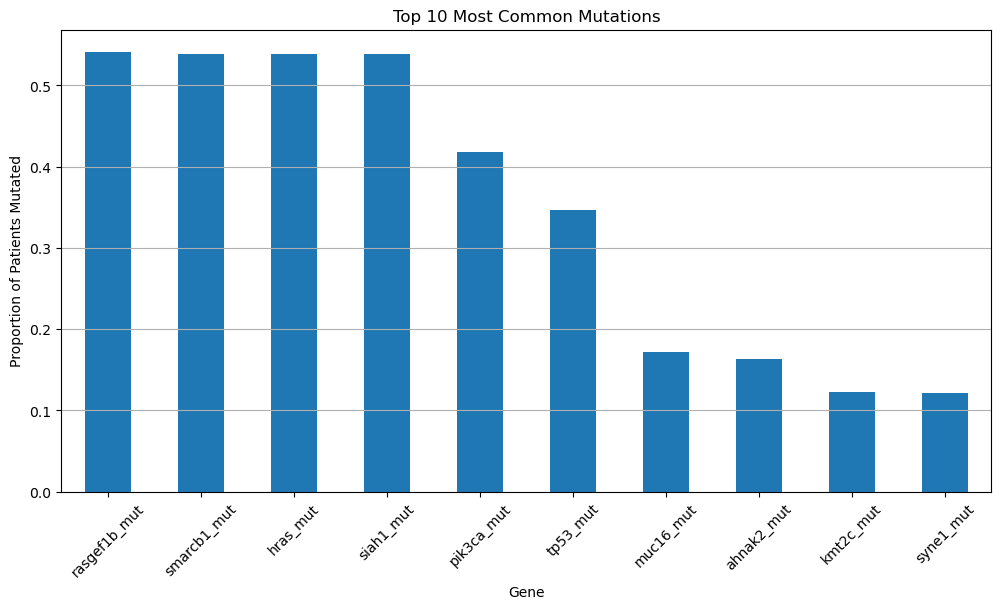

In [11]:
# Create a binary version of mutation columns
binary_mutations = filtered_df[mutation_cols].applymap(lambda x: 0 if x == "0" else 1)

# Merge back with the clinical columns
clinical_cols = [col for col in filtered_df.columns if col not in mutation_cols]
eda_df = pd.concat([filtered_df[clinical_cols], binary_mutations], axis=1)

# Mutation frequencies
mutation_rates = eda_df[mutation_cols].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
mutation_rates[:10].plot(kind='bar')
plt.title('Top 10 Most Common Mutations')
plt.ylabel('Proportion of Patients Mutated')
plt.xlabel('Gene')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

We are grouping patients by cancer subtype, and then calculating:
- “Among patients with subtype X, what proportion have a mutation in TP53?”

In [14]:
from mut_widget import create_mutation_widget

create_mutation_widget()

Dropdown(description='Select Mutation:', layout=Layout(width='50%'), options=('tp53_mut', 'pik3ca_mut', 'brca1…

Output()